Video of A Day of White Island West Rim Camera Images
--

This focuses on the area of the crater lake below the commonly used viewing position.

Uses astroplan https://astroplan.readthedocs.io/en/latest/ to calculate sunrise and sunset times

In [16]:
import cv2
import matplotlib.pyplot as plt
import os
import datetime
import pytz

from astroplan import Observer
from astropy.time import Time
from astropy.coordinates import EarthLocation
import astropy.units as u

%matplotlib inline

In [2]:
def sunset(time):
    sunset = wi.sun_set_time(time, which="next") 
    sunset = wi.astropy_time_to_datetime(sunset)
    return (sunset)

In [3]:
def sunrise(time):
    sunrise = wi.sun_rise_time(time, which="next") 
    sunrise = wi.astropy_time_to_datetime(sunrise)
    return (sunrise)

**Set up parameters**

In [4]:
#white island location, for sunrise and sunset
#http://astroplan.readthedocs.io/en/latest/api/astroplan.Observer.html#astroplan.Observer.sun_rise_time
white_island = EarthLocation(lat=-37.5245*u.deg, lon=177.1893*u.deg, height=0*u.m)
wi = Observer(location=white_island, name="WI", timezone="UTC")

**Use a sample image to determine the crop area**

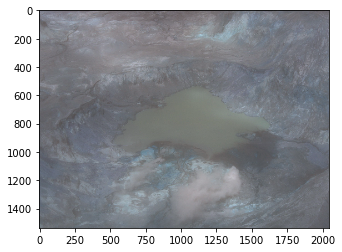

In [6]:
img = cv2.imread('/home/sherburn/Dropbox/work/2018.059.0210.02.WIWR.jpg')
plt.imshow(img)

In [7]:
crop = img[400:700,750:1450]

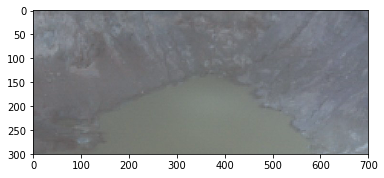

In [8]:
plt.imshow(crop)

**Using image date, calculate sunrise and sunset times**

In [27]:
#UTC date for images
date = '2018-01-01'

#date = year+'-'+month+'-'+day
time = Time(date)
sun_set = sunset(time)
sun_rise = sunrise(time)

In [26]:
date = '2018-01-01'
d = date[:4]+date[5:7]+date[8:10]

'20180101'

**Loop through test images on disk**

In [18]:
camdir = '/home/sherburn/geonet/volcam_images'
crpdir = os.path.join(camdir, 'crop')

In [28]:
#find time of each file, crop if in daylight and write cropped file to a new folder
for file in sorted(os.listdir(camdir)):
    if file.startswith(d):
        imfile = os.path.join(camdir, file)
        year = file[:4]
        month = file[4:6]
        day = file[6:8]
        hour = file[8:10]
        minute = file[10:12]
        second = file[12:14]
        imtime = pytz.utc.localize(datetime.datetime(int(year), int(month), int(day), int(hour), int(minute), int(second)))
        if (imtime < sun_set or imtime > sun_rise):
            #print (imtime)
            img = cv2.imread(imfile)
            crop = img[400:700,750:1450]
            crfile = os.path.join(crpdir, file)
            cv2.imwrite(crfile, crop)
height,width,layers = crop.shape

**Make video of cropped images**

In [31]:
vidfile = os.path.join(crpdir, date+'.avi')

fps = 5
fourcc = cv2.VideoWriter_fourcc(*'XVID')
video = cv2.VideoWriter(vidfile,fourcc,fps,(width,height))
for file in sorted(os.listdir(crpdir)):
    if file.startswith(d):
        imfile = os.path.join(crpdir, file)
        img = cv2.imread(imfile)
        video.write(img)
cv2.destroyAllWindows
video.release()